В этом задании будут предсказываться следующие показатели американской экономики (даны в том же порядке, в котором они идут в датасете): безработица, процент личных накоплений (то есть процент располагаемого дохода, который переводят в накопления), денежная масса, реальный располагаемый доход, личные расходы на потребление, реальный эффективный валютный курс (рассчитывается как взвешенная сумма индексов реального валютного курса данного года по отношению к базовому), текущая доходность, реальная ставка по федеральным фондам (процентная ставка, по которой банки США предоставляют в кредит свои избыточные резервы на короткие сроки другим банкам), общие траты на строительство, индекс промышленного производства, базовый индекс потребительских цен, ВВП, общие государственные расходы, торговый баланс. Информация собиралась января 1981 по октябрь 2021 раз в месяц (по последним трём критериям информация собиралась раз в 3 месяца).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Предобработка

Поскольку данные собирались в разное время, их нужно привести к одной частоте.

478

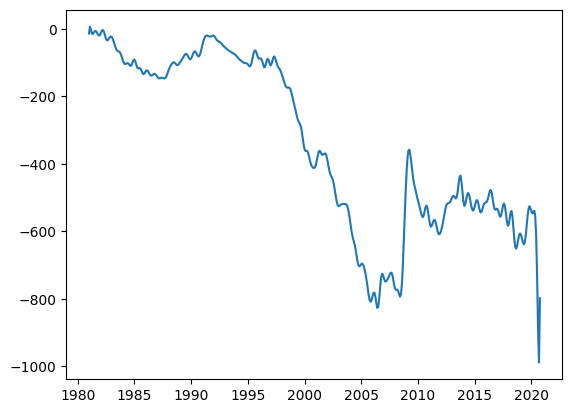

In [2]:
qrr = pd.read_csv('macro_quarterly.csv')
qrr_index = pd.to_datetime(qrr["date"], format="%d/%m/%Y")
qrr = qrr.drop(["date"], axis="columns")
qrr.index = qrr_index
qrr = qrr.asfreq("MS").interpolate(method='polynomial', order=7)
plt.plot(qrr["netexp"])
len(qrr["gdp"])

160

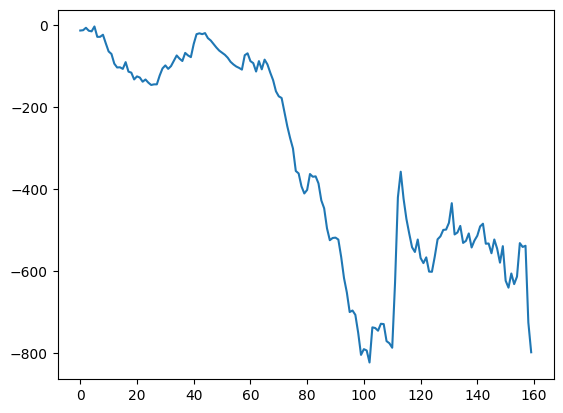

In [3]:
plt.plot(pd.read_csv('macro_quarterly.csv')["netexp"])
len(pd.read_csv('macro_quarterly.csv')["netexp"])

In [4]:
mth = pd.read_csv('macro_monthly.csv')
df_index = pd.to_datetime(mth["DATE"], format="%Y-%m-%d")
mth = mth.drop(["DATE"], axis="columns")
mth.index = df_index
df = mth.copy(deep=True)
for c in qrr.columns:
    df[c] = qrr[c].copy(deep=True)
#df["reer"] = df["reer"].fillna(df["reer"].mean())
#df["tcs"] = df["tcs"].fillna(df["tcs"].mean())
df = df.dropna().asfreq('W').interpolate(method='polynomial', order=1).dropna()

Для удобства дальнейшей работы я увеличил частоту данных и заполнил пропуски линейно.

In [5]:
len(df)

1349

In [6]:
df.head()

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,gdp,gte,netexp
DATE,,,,,,,,,,,,,,
1994-05-01,6.100000,7.600000,3472.840000,7487.400000,4669.500000,103.780000,7.183333,4.010968,532328.000000,68.51360,155.900000,7277.956924,2477.519695,-92.776594
1994-05-08,6.085714,7.597143,3473.542286,7492.151429,4674.691429,103.799714,7.200367,4.054295,532659.485714,68.60142,155.988571,7284.937840,2480.516932,-93.135234
1994-05-15,6.071429,7.594286,3474.244571,7496.902857,4679.882857,103.819429,7.217400,4.097622,532990.971429,68.68924,156.077143,7291.918757,2483.514170,-93.493874
1994-05-22,6.057143,7.591429,3474.946857,7501.654286,4685.074286,103.839143,7.234433,4.140949,533322.457143,68.77706,156.165714,7298.899673,2486.511407,-93.852515
1994-05-29,6.042857,7.588571,3475.649143,7506.405714,4690.265714,103.858857,7.251467,4.184276,533653.942857,68.86488,156.254286,7305.880590,2489.508644,-94.211155


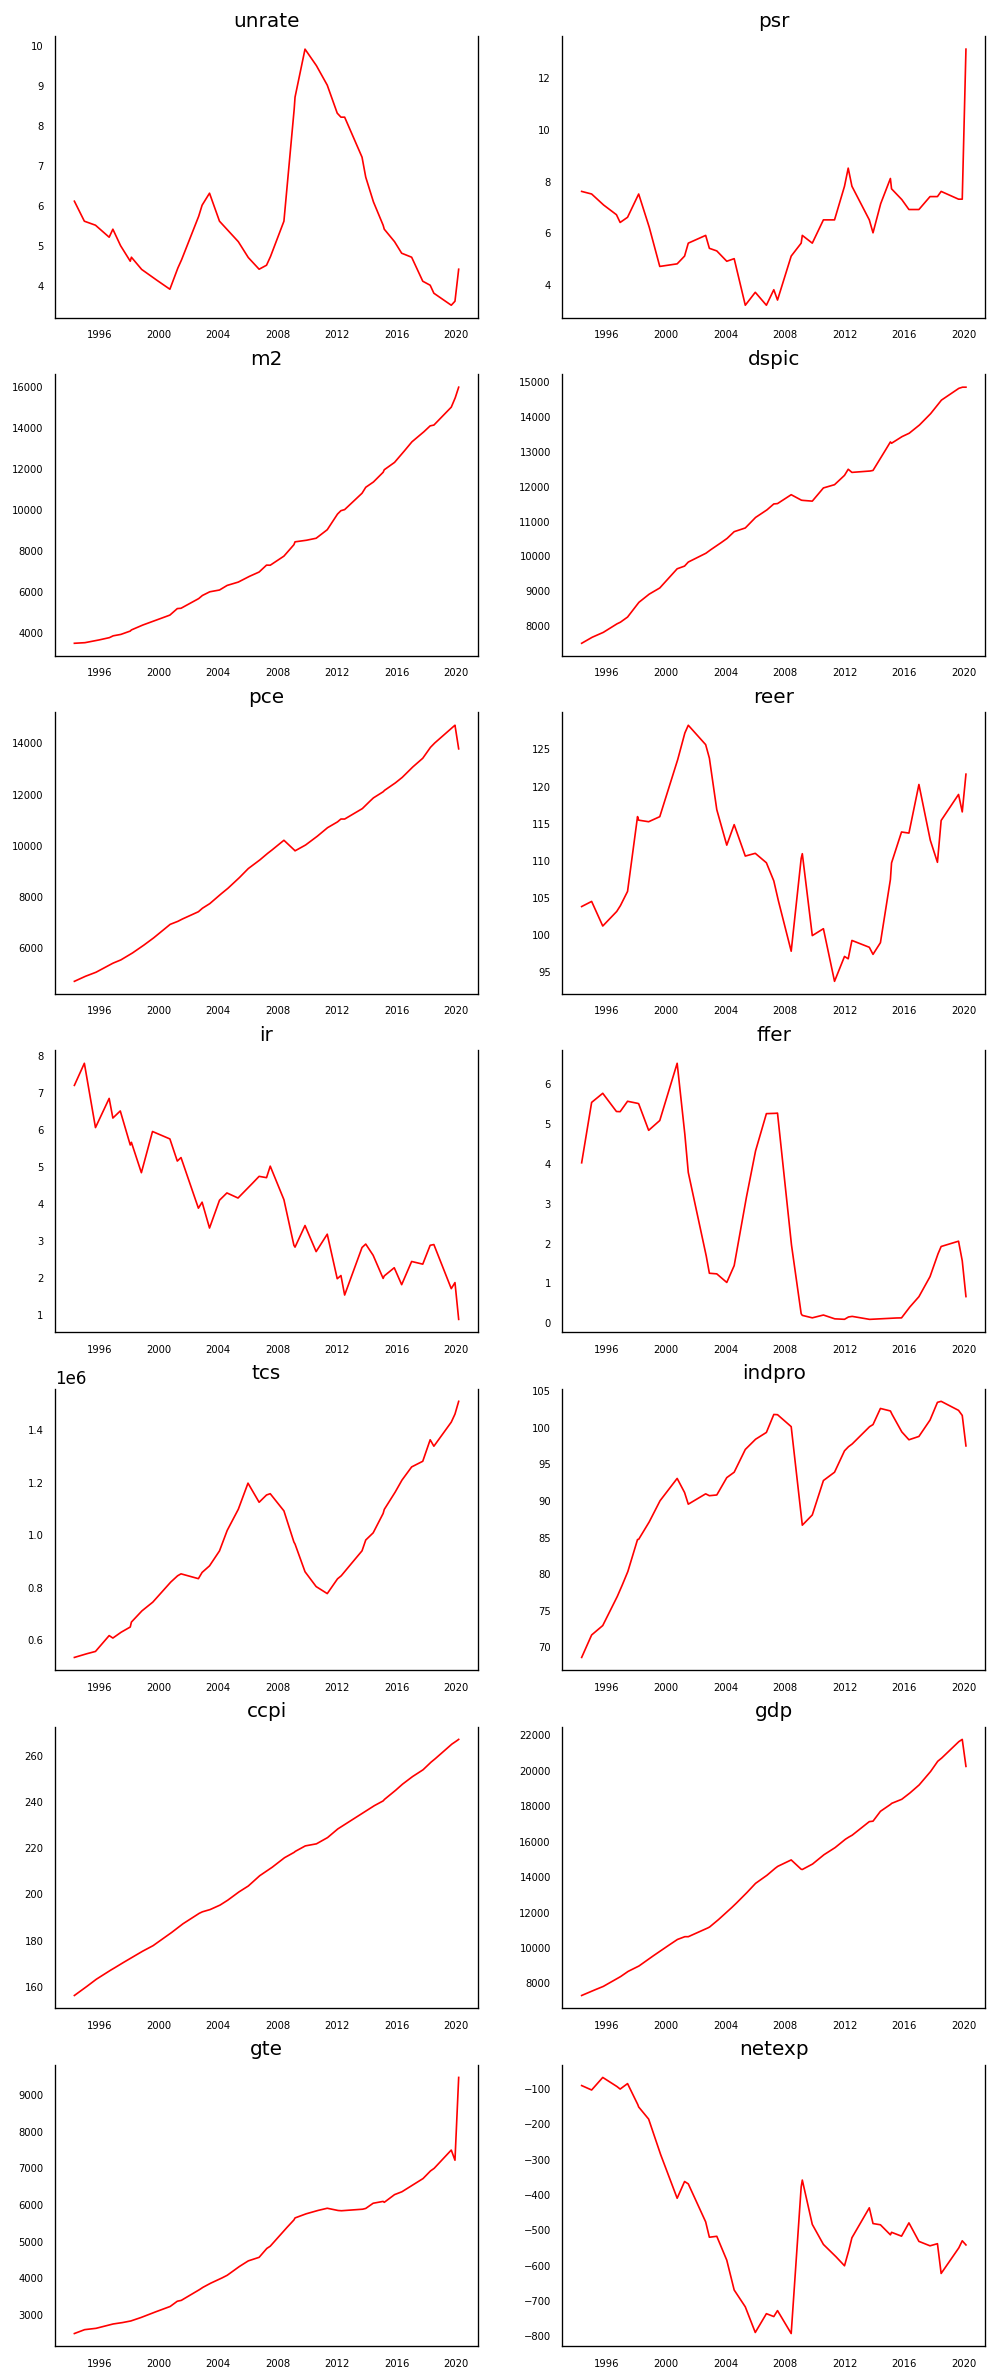

In [7]:
fig, axes = plt.subplots(nrows=7, ncols=2, dpi=120, figsize=(10,25))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [8]:
train = df[:int(0.9*(len(data)))]
test = df[int(0.9*(len(data))):]

In [9]:
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            r2_score)
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validate(true, pred):
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("MAPE:", mean_absolute_percentage_error(true, pred))
    print("R2:", r2_score(true, pred))

### Характеристики

In [10]:
df.describe()

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,gdp,gte,netexp
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,5.655189,6.136879,8028.501271,11163.022572,9303.212713,109.882550,3.983744,2.548892,9.438995e+05,92.879550,209.478332,13895.084908,4756.365861,-462.244406
std,1.643384,1.397701,3542.022013,2047.513819,2850.155922,8.770776,1.618254,2.202335,2.405662e+05,8.783236,31.016226,4090.847889,1528.457586,202.031467
min,3.500000,3.200000,3472.840000,7487.400000,4669.500000,93.720000,0.870000,0.080000,5.323280e+05,68.513600,155.900000,7277.956924,2477.519695,-793.787903
25%,4.502857,5.088462,4873.210769,9633.369231,6902.292308,102.149583,2.527336,0.174923,7.876105e+05,89.663413,182.792308,10448.302154,3221.477923,-576.626211
50%,5.237500,6.500000,7282.820000,11490.100000,9643.600000,110.675714,3.959586,1.929454,9.020171e+05,94.016326,209.747000,14393.925393,4792.841000,-509.385032
75%,6.085714,7.288525,10841.096923,12447.807692,11436.161538,115.819016,5.197943,5.048238,1.134103e+06,99.765523,234.862923,17101.533182,5885.872932,-370.634000
max,9.900000,13.100000,15972.200000,14844.100000,14686.300000,128.170000,7.779500,6.509355,1.507058e+06,103.547400,266.820000,21742.821517,9462.473699,-69.780000


##### Тест Йохансена

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


print(*coint_johansen(qrr, -1, 1).eig)
print(*coint_johansen(mth.dropna(),-1,1).eig)

0.40472998955432027 0.03535848889360877 0.012989151235960585
0.5041555017639465 0.27585184419762604 0.17981786551666315 0.1449344497585303 0.11080335774257564 0.10247817395352654 0.08445709347201784 0.054586004105431345 0.025086052695005644 0.022302251363381626 4.708047773473682e-05


Собственные значения по модулю меньше единицы, и, следовательно, рад стационарен.

##### Тест на коинтегральность

In [12]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [13]:
cointegration_test(qrr)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
gdp    ::  48.85     > 24.2761   =>   True
gte    ::  14.69     > 12.3212   =>   True
netexp ::  3.43      > 4.1296    =>   False


In [14]:
cointegration_test(mth.dropna())

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
unrate ::  466.95    > 263.2603  =>   True
psr    ::  342.26    > 219.4051  =>   True
m2     ::  242.66    > 179.5199  =>   True
dspic  ::  182.29    > 143.6691  =>   True
pce    ::  132.54    > 111.7797  =>   True
reer   ::  89.3      > 83.9383   =>   True
ir     ::  54.64     > 60.0627   =>   False
ffer   ::  30.9      > 40.1749   =>   False
tcs    ::  16.97     > 24.2761   =>   False
indpro ::  6.08      > 12.3212   =>   False
ccpi   ::  0.06      > 4.1296    =>   False


In [15]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
unrate ::  581.9     > nan       =>   False
psr    ::  490.8     > nan       =>   False
m2     ::  409.24    > 311.1288  =>   True
dspic  ::  330.69    > 263.2603  =>   True
pce    ::  270.37    > 219.4051  =>   True
reer   ::  215.26    > 179.5199  =>   True
ir     ::  166.86    > 143.6691  =>   True
ffer   ::  127.99    > 111.7797  =>   True
tcs    ::  93.89     > 83.9383   =>   True
indpro ::  65.89     > 60.0627   =>   True
ccpi   ::  40.51     > 40.1749   =>   True
gdp    ::  21.18     > 24.2761   =>   False
gte    ::  8.21      > 12.3212   =>   False
netexp ::  1.75      > 4.1296    =>   False


C:\Users\Иван\AppData\Local\Temp\ipykernel_4296\2463291003.py:5: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  out = coint_johansen(df,-1,5)


In [16]:
for c1 in mth.columns:
    for c2 in mth.columns:
        if c1 != c2:
            cointegration_test(df.drop([c1, c2], axis="columns"))
            print()

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
m2     ::  398.83    > 311.1288  =>   True
dspic  ::  314.73    > 263.2603  =>   True
pce    ::  255.92    > 219.4051  =>   True
reer   ::  201.97    > 179.5199  =>   True
ir     ::  156.05    > 143.6691  =>   True
ffer   ::  116.26    > 111.7797  =>   True
tcs    ::  84.27     > 83.9383   =>   True
indpro ::  57.21     > 60.0627   =>   False
ccpi   ::  36.49     > 40.1749   =>   False
gdp    ::  21.04     > 24.2761   =>   False
gte    ::  7.22      > 12.3212   =>   False
netexp ::  0.79      > 4.1296    =>   False

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
psr    ::  431.77    > 311.1288  =>   True
dspic  ::  345.04    > 263.2603  =>   True
pce    ::  271.96    > 219.4051  =>   True
reer   ::  214.18    > 179.5199  =>   True
ir     ::  166.98    > 143.6691  =>   True
ffer   ::  120.55    > 111.7797  =>   True
tcs    ::  87.35     > 83.9383   =>   True

Из-за того, что функция coint_johansen не обрабатывает целиком ряды, в которых более 12 показателей, приходится делать вывод окольными путями. Для каждого показателя нашлась хотя бы одна комбинация из 12 или менее показателей так, чтобы ряд исходного показателя был стационарным, так что можно сделать вывод, что коинтегрирован весь ряд.

##### Тест причинности Грэйнджера

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=42
test_gcm = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [18]:
grangers_causation_matrix(df, variables = df.columns)

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warni

,unrate_x,psr_x,m2_x,dspic_x,pce_x,reer_x,ir_x,ffer_x,tcs_x,indpro_x,ccpi_x,gdp_x,gte_x,netexp_x
unrate_y,1.0000,0.0000,0.0017,0.0030,0.0846,0.0000,0.0025,0.0000,0.0000,0.0196,0.2173,0.0053,0.0000,0.0000
psr_y,0.0239,1.0000,0.0000,0.0000,0.0000,0.0006,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
m2_y,0.0000,0.0007,1.0000,0.0158,0.0000,0.0018,0.0000,0.0000,0.7621,0.0000,0.0000,0.0000,0.0000,0.0000
dspic_y,0.0000,0.2181,0.0000,1.0000,0.0505,0.0004,0.0000,0.0000,0.1354,0.0000,0.0054,0.0000,0.0000,0.0109
pce_y,0.0142,0.0000,0.0000,0.1630,1.0000,0.0006,0.0002,0.0000,0.1315,0.0000,0.0000,0.0000,0.0000,0.0000
reer_y,0.0000,0.0000,0.0000,0.0016,0.0794,1.0000,0.4196,0.0310,0.1302,0.2146,0.0000,0.0023,0.0000,0.0000
ir_y,0.3724,0.0000,0.0003,0.0009,0.0002,0.0564,1.0000,0.0043,0.1488,0.0401,0.0000,0.0001,0.0000,0.2019
ffer_y,0.7278,0.6002,0.0075,0.0017,0.0026,0.0000,0.0000,1.0000,0.0688,0.0001,0.0008,0.0032,0.0000,0.0464
tcs_y,0.0000,0.0000,0.0000,0.1073,0.3330,0.0000,0.0406,0.2371,1.0000,0.0004,0.0000,0.0569,0.0001,0.0000
indpro_y,0.0001,0.0044,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000


Большие значения есть между unrate и ffer (~0.73) и между tcs и m2 (~0.76); сравнительно большие значения также между psr и ffer (~0.6) и между psr и ccpi (~0.58). В остальных случаях нет особого смысла говорить о наличии причинно-следственной связи.

### Классические модели

##### VAR

In [19]:
from statsmodels.tsa.stattools import adfuller

def differ(dataset):
    #return pd.concat([dataset[c] for c in dataset.columns], axis=1)
    def dickey_fuller(df):
        alpha = 0.05
        ts = df
        dftest = adfuller(ts, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Users', 'Number of Observations Used'])

        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        return dfoutput["p-value"] >= alpha
    
    result = pd.DataFrame()
    #deriv = pd.DataFrame()
    t = False
    i = 0
    for c in dataset.columns:
        result[c] = dataset[c].copy(deep=True)
        #deriv[c] = dataset[c].copy(deep=True) * 0
        t = t or dickey_fuller(result[c])
    while t:
        i += 1
        t = False
        #deriv += result - result.diff().fillna(0)
        result = result.diff().fillna(0)
        for c in dataset.columns:
            t = t or dickey_fuller(result[c])
        '''if t:
            i += 1
            t = False
            #deriv += result - result.diff().fillna(0)
            result = result.diff().fillna(0)'''
    return result, i

In [20]:
from statsmodels.tsa.vector_ar.var_model import VAR


train_diff, diff_order = differ(train)
model = VAR(train_diff)
x = model.select_order(maxlags=72)
x.summary()

,AIC,BIC,FPE,HQIC
0,-26.39,-26.33,3.443e-12,-26.37
1,-63.66,-62.73*,2.250e-28*,-63.31*
2,-63.35,-61.56,3.066e-28,-62.68
3,-63.05,-60.39,4.149e-28,-62.05
4,-62.76,-59.24,5.551e-28,-61.43
5,-63.36,-58.97,3.044e-28,-61.70
6,-63.04,-57.78,4.220e-28,-61.05
7,-62.71,-56.60,5.840e-28,-60.40
8,-62.39,-55.41,8.068e-28,-59.76
9,-62.20,-54.35,9.827e-28,-59.24


In [21]:
model_fitted = model.fit(72, ic='aic')
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Jan, 2024
Time:                     12:29:05
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -8.02854
Nobs:                     1142.00    HQIC:                  -46.8338
Log likelihood:           31625.6    FPE:                4.11536e-25
AIC:                     -70.3776    Det(Omega_mle):     5.81792e-29
--------------------------------------------------------------------
Results for equation unrate
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.003804         0.011646           -0.327           0.744
L1.unrate          0.704850         0.168121            4.193           0.000
L1.psr            -0.046692         0.126352           -0.370          

In [22]:
lag_order = model_fitted.k_ar
print(lag_order) 

72


In [23]:
# test_diff, diff_order = differ(test)
forecast_input = train_diff.values[-lag_order:]
diff_order

1

In [24]:
nobs = len(test) # количество точек для предсказания
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=df.index[len(df)-nobs:], columns=df.columns + ('_' + str(diff_order) + 'd'))
#df_forecast

In [25]:
def invert_transformation(df_train, df_forecast, second_diff):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        #for i in range(second_diff, 1, -1):
            #df_fc[str(col)+'_' + str(i - 1) + 'd'] = (df_train[col].iloc[-(i + 1)]-df_train[col].iloc[-i]) + df_fc[str(col)+'_' + str(i) + 'd'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [26]:
df_forecast = invert_transformation(train, df_forecast, (diff_order > 1))

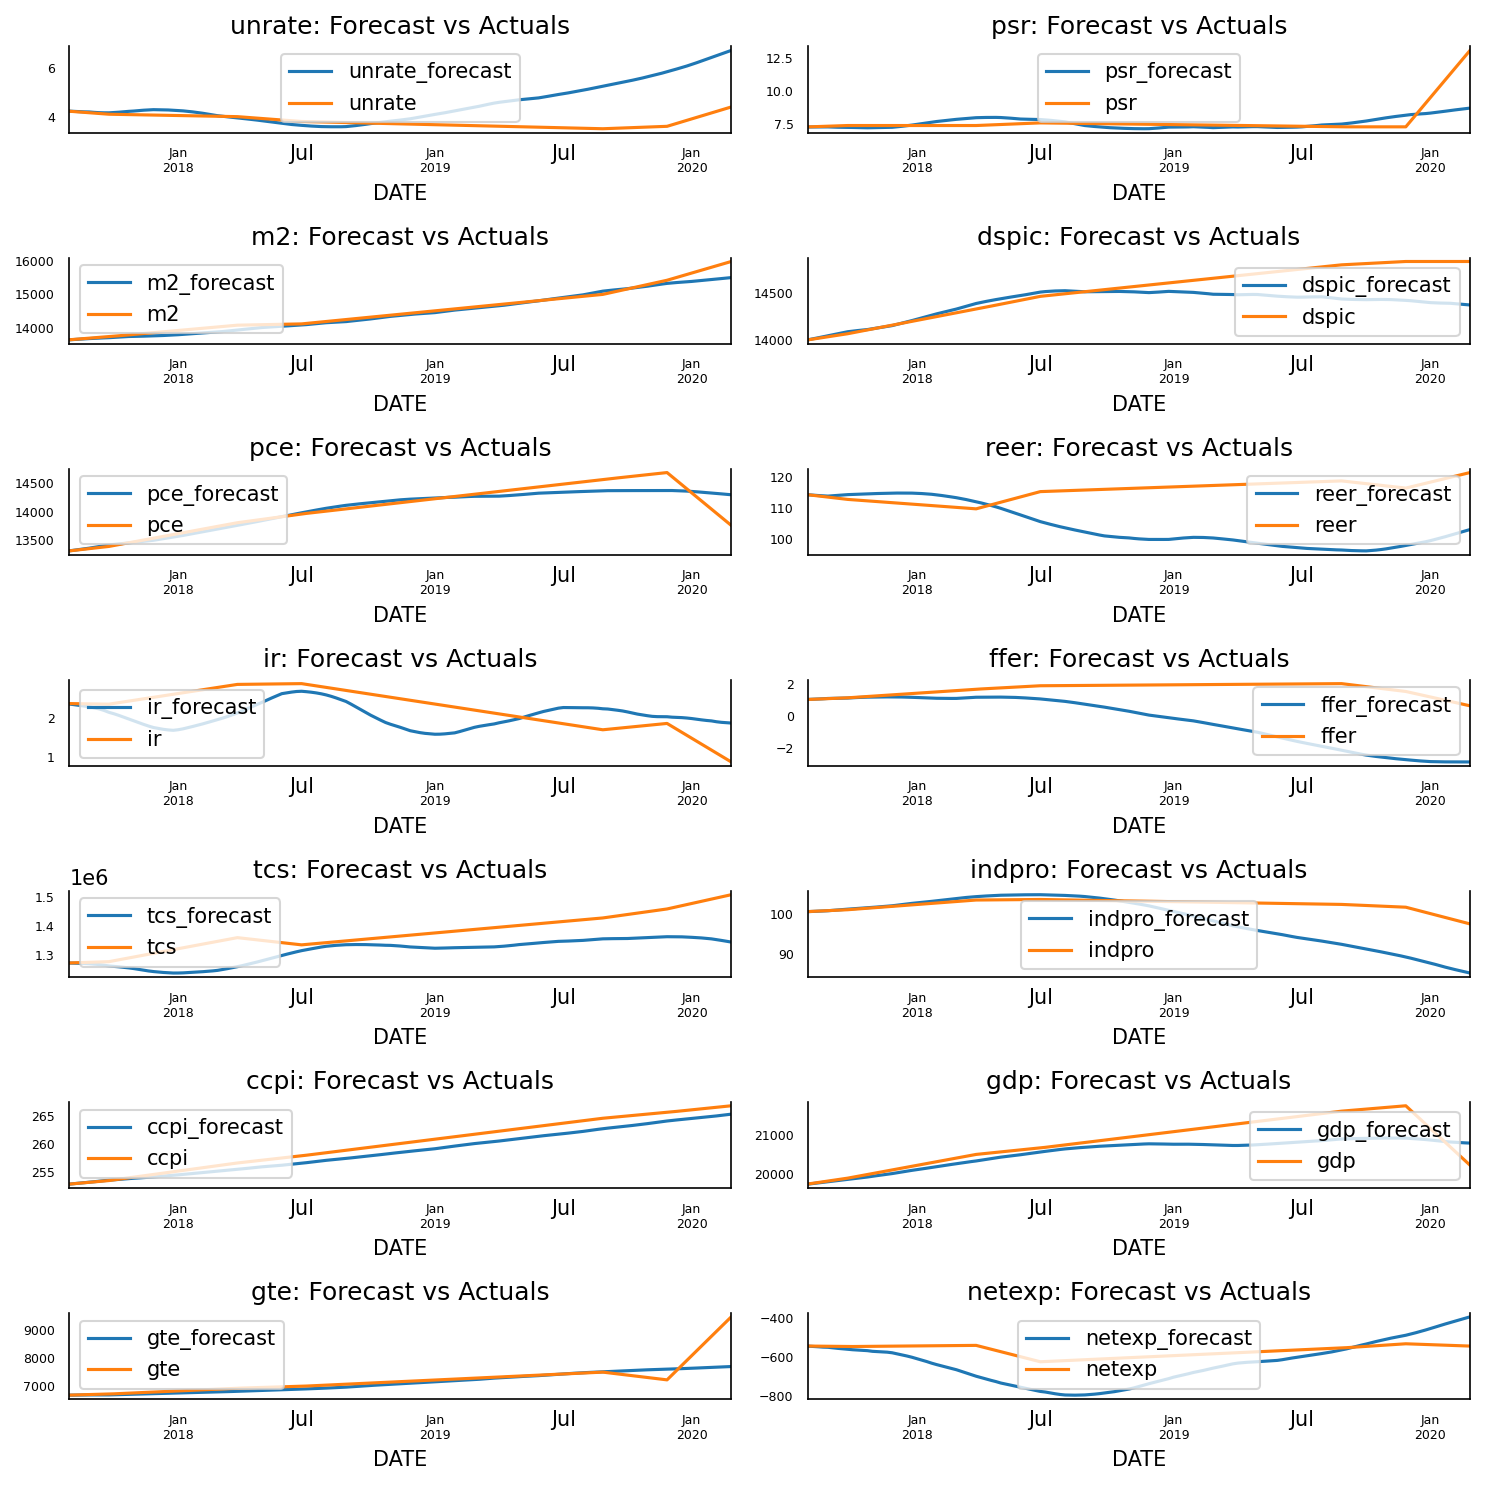

In [27]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [28]:
validate(np.array([df_forecast[col+'_forecast'] for col in df.columns]), np.array([test[col][-nobs:] for col in df.columns]))

MSE: 356643502.7209684
RMSE: 18885.00735294981
MAE: 4454.215761863867
MAPE: 35.450152231509165
R2: 0.996888723352728


В своих рассуждениях я буду опираться на MAPE и на R2 (так как это относительные параметры), а также на графики. Судя по почти идеальному R2, предсказания очень близки к реальным данным; не слишком низкий MAPE можно объяснить тем, что местами истинные значения близки к нулю. Не считая reer, ir и ffer, графики предсказаний и реальных значений действительно очень близки, что смотрится более выигрышно на фоне того, что часть данных делают резкий скачок в 2020 году по причине эпидемии коронавируса, которое из экономических данных не выводится никак, а, следовательно, предсказать этот скачок по предыдущим данным модели просто невозможно.

### VARMA

In [29]:
from statsmodels.tsa.statespace import varmax

Порядки модели VARMA выбраны под влиянием вопросов оптимизации, связанных с очень продолжительным временем выполнения обучения модели VARMA. Выбор порядка p = 12 также обоснован тем, что на предыдущей модели у него был aic, не сильно отличающийся от лучшего.

In [30]:
model = varmax.VARMAX(train_diff, order=(12, 1))
#x = model.select_order(maxlags=12)
#x.summary()

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [31]:
%%time
model_fitted = model.fit()
model_fitted.summary()

LinAlgError: Schur decomposition solver error.

Сделаем предикт, несмотря на LinAlgError.

In [ ]:
#lag_order = model_fitted.k_ar
#print(lag_order) 

In [32]:
#test_diff, diff_order = differ(test)
forecast_input = train.values[-12:]
diff_order

1

In [35]:
nobs = len(test)
fc = model_fitted.forecast(y=model_fitted.endog, steps=nobs) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=df.index[len(df)-nobs:], columns=df.columns + ('_' + str(diff_order) + 'd'))
df_forecast

,unrate_1d,psr_1d,m2_1d,dspic_1d,pce_1d,reer_1d,ir_1d,ffer_1d,tcs_1d,indpro_1d,ccpi_1d,gdp_1d,gte_1d,netexp_1d
DATE,,,,,,,,,,,,,,
2017-08-06,-0.010966,0.002363,10.284213,8.896193,10.682235,-0.183598,-0.014150,0.014976,178.147531,0.040949,0.080417,15.198228,3.275053,-0.870599
2017-08-13,-0.011543,0.003564,9.747123,10.344486,11.175337,-0.131843,-0.016840,0.013385,-239.793243,0.051847,0.081194,15.153644,2.636797,-1.315096
2017-08-20,-0.010483,0.001801,9.476670,10.836927,11.991199,-0.114953,-0.015644,0.013330,-463.198258,0.058558,0.080854,15.255180,2.153905,-1.754710
2017-08-27,-0.008119,0.002224,8.357671,11.311747,12.215221,-0.096552,-0.016528,0.013154,-701.747585,0.064371,0.081332,15.994813,2.085218,-1.872954
2017-09-03,-0.003275,0.000198,8.472703,11.359661,11.131144,-0.095634,-0.020145,0.020853,-894.067464,0.050189,0.079824,14.994925,1.856428,-0.875089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02,0.069360,0.052814,14.430498,-1.004377,-6.470807,0.476568,-0.011674,-0.000721,-1622.687102,-0.316683,0.090822,-11.098073,7.887860,7.302880
2020-02-09,0.075841,0.046691,14.419206,-4.329785,-8.234493,0.467728,-0.021440,-0.000608,-2494.115232,-0.296712,0.103692,-8.160856,7.480125,7.787644
2020-02-16,0.074787,0.045302,14.747920,-4.772358,-7.906916,0.455119,-0.015182,-0.000615,-2718.580066,-0.290690,0.107234,-7.241573,7.525146,7.200658


In [36]:
df_forecast = invert_transformation(train, df_forecast, (diff_order > 1))

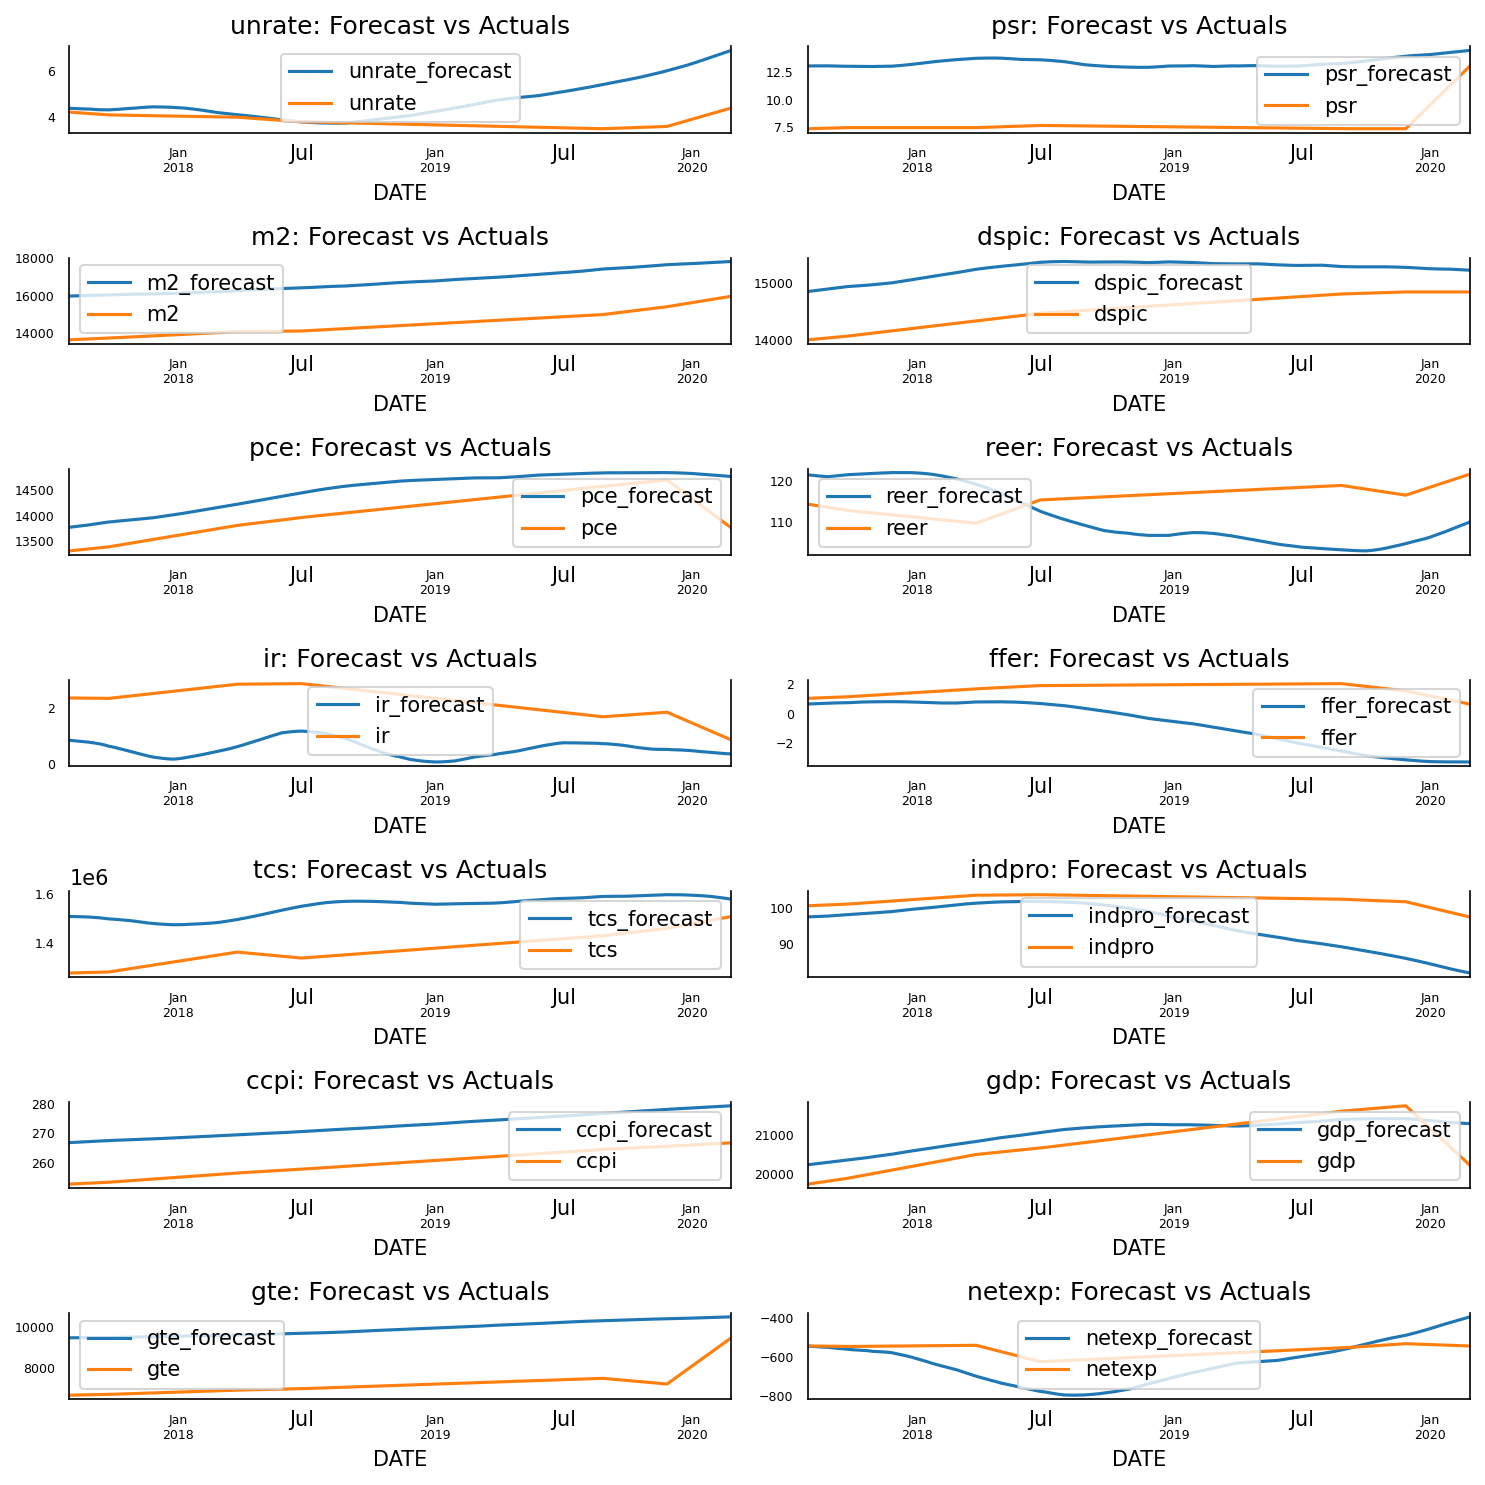

In [37]:
df_forecast = invert_transformation(test, df_forecast, second_diff=(diff_order > 1))
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [38]:
validate(np.array([df_forecast[col+'_forecast'] for col in df.columns]), np.array([test[col][-nobs:] for col in df.columns]))

MSE: 2191713195.4674973
RMSE: 46815.736622075034
MAE: 12726.250707841562
MAPE: 74.42727065238816
R2: 0.9860340675955597


Несмотря на заметное увеличение расстояния между графиками, а также меньшее совпадение "формы" графиков, R2 всё ещё почти единица - значит, предсказание очень близко к истине.

Заключение: обе модели очень хорошо предсказали ряд, при условии, что он стационарен. Хотя VARMA способна на более точные предсказания, из-за времени работы при прочих равных условиях я бы отдал предпочтение VAR.